# Supervised learning portion

In [1]:
#Add matrix to log regression, show the additional feature slection, PCA, tried other models with loop, 
#other evaluation metrics, hyperparameter tuning and regularization at the end
#failure analysis, fill NAs

In [52]:
#importing packages
import pandas as pd
import numpy as np
import sys
import codecs
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('/Users/arturoavila/Documents/Milestone II Project/spotify-market-popularity/functions')
#importing fuctions we created
from feature_engineering import *
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
import ipywidgets as widgets
from IPython.display import display
from geopy.geocoders import Nominatim
import pycountry_convert as pc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline


In [53]:
audio_path, artists_path, playlists_path = (
    r"../../data/spotify_audio_features.json",
    r"../../data/spotify_artists.json",
    r"../../data/spotify_top_50_playlists.json",
)

In [54]:
artists, tracks = get_data(audio_path, artists_path, playlists_path)
display(artists.head())
display(tracks.head())

,artist_id,artist_name,followers,genres,popularity,parent_genre
0,1Kjs5u8GQf6zCFdTj6SI9E,Malik Montana,1038436,"[polish drill, polish hip hop, polish trap]",64,NaN
1,2CKOmarVWvWqkNWUatHCex,Ana Castela,2932225,"[agronejo, funk rj, sertanejo pop]",82,Country
2,7krakxeyEmge6pzTthKNyg,Bausa,8035,[russelater],52,Electronic
3,66RfYVdftqnuHRicyClgL0,Dharius,2313917,[mexican hip hop],69,Hip Hop
4,29zSTMejPhY0m7kwNQ9SPI,Lola Amour,709383,[opm],67,Pop


,track_id,track_name,playlist_id,album_type,album_id,artist_ids,explicit,track_popularity,market_id,num_avail_markets,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2IGMVunIBsBLtEQyoI1Mu7,Paint The Town Red,37i9dQZEVXbNG2KDcFcKOF,single,54dZypaXHAIDzBe9ujAZ63,[{'id': '5cj0lLjcoR7YOSnhnX0Po5'}],True,100,global,183,...,-8.603,1,0.174,0.269,0.000003,0.0901,0.732,99.968,231750,4
1,2IGMVunIBsBLtEQyoI1Mu7,Paint The Town Red,37i9dQZEVXbK4fwx2r07XW,single,54dZypaXHAIDzBe9ujAZ63,[{'id': '5cj0lLjcoR7YOSnhnX0Po5'}],True,100,australia,183,...,-8.603,1,0.174,0.269,0.000003,0.0901,0.732,99.968,231750,4
2,2IGMVunIBsBLtEQyoI1Mu7,Paint The Town Red,37i9dQZEVXbM1EaZ0igDlz,single,54dZypaXHAIDzBe9ujAZ63,[{'id': '5cj0lLjcoR7YOSnhnX0Po5'}],True,100,austria,183,...,-8.603,1,0.174,0.269,0.000003,0.0901,0.732,99.968,231750,4
3,2IGMVunIBsBLtEQyoI1Mu7,Paint The Town Red,37i9dQZEVXbLRLeF2cVSaP,single,54dZypaXHAIDzBe9ujAZ63,[{'id': '5cj0lLjcoR7YOSnhnX0Po5'}],True,100,belarus,183,...,-8.603,1,0.174,0.269,0.000003,0.0901,0.732,99.968,231750,4
4,2IGMVunIBsBLtEQyoI1Mu7,Paint The Town Red,37i9dQZEVXbND4ZYa46PaA,single,54dZypaXHAIDzBe9ujAZ63,[{'id': '5cj0lLjcoR7YOSnhnX0Po5'}],True,100,belgium,183,...,-8.603,1,0.174,0.269,0.000003,0.0901,0.732,99.968,231750,4


In [55]:
def update_plot(column):
    plt.figure(figsize=(8, 4))
    sns.countplot(data=tracks, x=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

column_dropdown = widgets.Dropdown(options=tracks.columns, description='Select a Column:')


In [56]:
interactive_plot = widgets.interactive(update_plot, column=column_dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='Select a Column:', options=('track_id', 'track_name', 'playlist_id…

In [57]:
#tracks.groupby('market_id')['track_id'].count().reset_index()
tracks.describe()

,track_popularity,num_avail_markets,num_artists,playlist_rank,tot_artist_followers,avg_artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2899.000000,2899.000000,2899.000000,2899.000000,2.899000e+03,2899.000000,2899.00000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000
mean,77.320455,179.904450,1.584339,25.492929,1.398940e+07,71.791396,0.68141,0.649504,5.483270,-6.644587,0.517765,0.101765,0.289506,0.017762,0.170086,0.534856,123.218677,193061.846499,3.916868
std,13.598239,23.681363,0.964184,14.430823,2.452359e+07,14.495052,0.13586,0.165477,3.562609,2.519374,0.499771,0.092185,0.253406,0.095588,0.124837,0.219624,28.177949,48609.939998,0.397961
min,25.000000,1.000000,1.000000,1.000000,4.600000e+01,28.000000,0.22200,0.034900,0.000000,-18.875000,0.000000,0.023200,0.000028,0.000000,0.023100,0.036400,59.157000,61673.000000,1.000000
25%,65.000000,183.000000,1.000000,13.000000,3.932020e+05,60.000000,0.58600,0.538000,2.000000,-8.067000,0.000000,0.040800,0.083700,0.000000,0.094300,0.369000,99.968000,161240.000000,4.000000
50%,80.000000,184.000000,1.000000,25.000000,2.834583e+06,74.000000,0.69100,0.673000,6.000000,-6.287000,1.000000,0.060600,0.213000,0.000002,0.117000,0.540000,123.926000,187027.000000,4.000000
75%,89.000000,184.000000,2.000000,38.000000,1.483963e+07,84.000000,0.79000,0.770000,9.000000,-4.930000,1.000000,0.132000,0.464500,0.000090,0.213000,0.718500,141.095000,219724.000000,4.000000
max,100.000000,184.000000,15.000000,50.000000,1.659658e+08,100.000000,0.97400,0.990000,11.000000,1.155000,1.000000,0.731000,0.981000,0.930000,0.963000,0.978000,209.808000,641941.000000,5.000000


In [58]:
tracks['artist_id'] = tracks['artist_ids'].apply(lambda x: x[0]['id'] if (x and 'id' in x[0]) else None)

In [59]:
tracks.loc[tracks['artist_id']=='6DARBhWbfcS9E4yJzcliqQ']


,track_id,track_name,playlist_id,album_type,album_id,artist_ids,explicit,track_popularity,market_id,num_avail_markets,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_id
1824,0YQJoDL6f46J0n1rOVkpxJ,Softly,37i9dQZEVXbMWDif5SCBJq,album,3BGU0BqGwBkYDHpfCWFm7I,"[{'id': '6DARBhWbfcS9E4yJzcliqQ'}, {'id': '3nq...",False,77,india,183,...,1,0.2040,0.1910,0.0,0.0791,0.902,92.986,155161,4,6DARBhWbfcS9E4yJzcliqQ
1836,6ygiy70ujkNOYXM1tQuMNe,Admirin' You (feat. Preston Pablo),37i9dQZEVXbMWDif5SCBJq,album,3BGU0BqGwBkYDHpfCWFm7I,"[{'id': '6DARBhWbfcS9E4yJzcliqQ'}, {'id': '3nq...",False,73,india,183,...,1,0.0851,0.0935,0.0,0.1040,0.675,96.018,214750,4,6DARBhWbfcS9E4yJzcliqQ
1860,1Er6TEtbyuW1b9QtBVkggD,Jee Ni Lagda,37i9dQZEVXbMWDif5SCBJq,album,3BGU0BqGwBkYDHpfCWFm7I,"[{'id': '6DARBhWbfcS9E4yJzcliqQ'}, {'id': '3nq...",False,76,india,183,...,0,0.1920,0.3380,0.0,0.1300,0.907,93.005,139355,4,6DARBhWbfcS9E4yJzcliqQ
2350,2uWZ7EGddFlA1DJ3Rzzvs2,Bachke Bachke (feat. Yarah),37i9dQZEVXbNy9tB5elXf1,album,3BGU0BqGwBkYDHpfCWFm7I,"[{'id': '6DARBhWbfcS9E4yJzcliqQ'}, {'id': '3nq...",False,77,pakistan,183,...,0,0.0861,0.3940,0.0,0.3930,0.461,88.086,210118,4,6DARBhWbfcS9E4yJzcliqQ


In [60]:
df = artists.merge(tracks, on="artist_id")
#df.rename(columns={'market_id': 'country'}, inplace=True)
df.columns


Index(['artist_id', 'artist_name', 'followers', 'genres', 'popularity',
       'parent_genre', 'track_id', 'track_name', 'playlist_id', 'album_type',
       'album_id', 'artist_ids', 'explicit', 'track_popularity', 'market_id',
       'num_avail_markets', 'num_artists', 'playlist_rank',
       'tot_artist_followers', 'avg_artist_popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

In [61]:
#Figuring out which ones are categorical
df[['danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature']]

df[['key','mode','time_signature']]

,key,mode,time_signature
0,6,1,4
1,5,1,4
2,3,0,4
3,3,0,4
4,8,0,4
...,...,...,...
2894,11,0,4
2895,8,1,4
2896,8,1,4
2897,5,0,4


In [62]:
#Dropping global to focus on countries
df = df[df["market_id"] != "global"]

In [63]:
df['market_id'].unique()

array(['brazil', 'norway', 'philippines', 'india', 'pakistan',
       'argentina', 'chile', 'peru', 'spain', 'poland', 'panama',
       'nigeria', 'france', 'colombia', 'dominican_republic', 'ecuador',
       'guatemala', 'mexico', 'usa', 'venezuela', 'italy', 'switzerland',
       'taiwan', 'japan', 'vietnam', 'thailand', 'germany', 'belarus',
       'romania', 'ukraine', 'morocco', 'singapore', 'saudi_arabia',
       'denmark', 'sweden', 'indonesia', 'czech_republic', 'egypt',
       'malaysia', 'slovakia', 'hong_kong', 'israel', 'austria',
       'kazakhstan', 'finland', 'south_korea', 'belgium', 'australia',
       'ireland', 'netherlands', 'uae', 'united_kingdom', 'new_zealand',
       'turkey', 'south_africa', 'canada', 'hungary'], dtype=object)

In [64]:
#Testing whether the first id on artist_id is the main artist
feats = df[df['track_name'].str.contains('feat')]
feats[['track_name','artist_name','artist_id', 'artist_ids']]


,track_name,artist_name,artist_id,artist_ids
7,Admirin' You (feat. Preston Pablo),Karan Aujla,6DARBhWbfcS9E4yJzcliqQ,"[{'id': '6DARBhWbfcS9E4yJzcliqQ'}, {'id': '3nq..."
9,Bachke Bachke (feat. Yarah),Karan Aujla,6DARBhWbfcS9E4yJzcliqQ,"[{'id': '6DARBhWbfcS9E4yJzcliqQ'}, {'id': '3nq..."
130,Comforter (feat. Ayra Starr),ElGrandeToto,4BFLElxtBEdsdwGA1kHTsx,"[{'id': '4BFLElxtBEdsdwGA1kHTsx'}, {'id': '3Zp..."
162,"MIRAGE (feat. Ozuna, GIMS & Sfera Ebbasta)",AriBeatz,6cNWiizYLCClZdnIvqU968,"[{'id': '6cNWiizYLCClZdnIvqU968'}, {'id': '1i8..."
193,xoxo (feat. ICEKIID),Artigeardit,6a3WaWgxrVmNIvaiTCI0Kk,"[{'id': '6a3WaWgxrVmNIvaiTCI0Kk'}, {'id': '4Zw..."
...,...,...,...,...
2864,Arranca (feat. Omega),Becky G,4obzFoKoKRHIphyHzJ35G3,"[{'id': '4obzFoKoKRHIphyHzJ35G3'}, {'id': '1Uj..."
2865,Arranca (feat. Omega),Becky G,4obzFoKoKRHIphyHzJ35G3,"[{'id': '4obzFoKoKRHIphyHzJ35G3'}, {'id': '1Uj..."
2866,Arranca (feat. Omega),Becky G,4obzFoKoKRHIphyHzJ35G3,"[{'id': '4obzFoKoKRHIphyHzJ35G3'}, {'id': '1Uj..."
2882,Gangnam Style (feat. DJ Maphorisa & Kabza De S...,Mas Musiq,3fdFRgy3GmfiWQqeKbmFS8,"[{'id': '3fdFRgy3GmfiWQqeKbmFS8'}, {'id': '0oW..."


# Feature Engineering

In [65]:
#Adding continent
df["market_id"] = df["market_id"].str.replace("_", " ").str.title()
df["market_id"] = df["market_id"].replace("Uae","United Arab Emirates")
df["market_id"] = df["market_id"].replace("Usa","United States")

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

df["continent"] = df["market_id"].apply(country_to_continent)

In [66]:
df['feat'] = df['track_name'].str.contains('feat').astype(int)

In [67]:
rfe_df = df.copy()
pca_df = df.copy()

In [68]:
len(df.columns)

35

# Manual Feature Selection

In [69]:
df.columns

Index(['artist_id', 'artist_name', 'followers', 'genres', 'popularity',
       'parent_genre', 'track_id', 'track_name', 'playlist_id', 'album_type',
       'album_id', 'artist_ids', 'explicit', 'track_popularity', 'market_id',
       'num_avail_markets', 'num_artists', 'playlist_rank',
       'tot_artist_followers', 'avg_artist_popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'continent', 'feat'],
      dtype='object')

In [70]:
df['artist_name']

0       Ana Castela
1       Ana Castela
2             Bausa
3             Bausa
4        Lola Amour
           ...     
2894        Element
2895          dhruv
2896          dhruv
2897        Werenoi
2898        Werenoi
Name: artist_name, Length: 2849, dtype: object

# Feature transformation

In [71]:
label_encoders = {}
for column in ['artist_name', 'album_type','continent','key','mode','time_signature','feat']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [72]:
df['artist_name']

0        66
1        66
2       126
3       126
4       519
       ... 
2894    284
2895    979
2896    979
2897    934
2898    934
Name: artist_name, Length: 2849, dtype: int64

In [73]:
genre_counts = df['genres'].explode().value_counts()

# Select the top 50 genres
top_genres = genre_counts.head(100).index

# Create a new DataFrame with the top 50 genres and an "Other" category
df_top_genres = df.copy()
df_top_genres['genres'] = df['genres'].apply(lambda x: [genre if genre in top_genres else 'Other' for genre in x])

# Use MultiLabelBinarizer to one-hot encode the genres
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(df_top_genres['genres']), columns=mlb.classes_, index=df.index)
df = pd.concat([df_top_genres.drop('genres', axis=1), genres_encoded], axis=1)


In [74]:
df_top_genres

,artist_id,artist_name,followers,genres,popularity,parent_genre,track_id,track_name,playlist_id,album_type,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,continent,feat
0,2CKOmarVWvWqkNWUatHCex,66,2932225,"[agronejo, Other, Other]",82,Country,4Z2i41GDQyu3KRpBavEnyR,Solteiro Forçado - Boiadeira Internacional,37i9dQZEVXbKzoK95AbRy9,2,...,0.0275,0.636,0.000000,0.2450,0.436,139.975,194582,2,5,0
1,2CKOmarVWvWqkNWUatHCex,66,2932225,"[agronejo, Other, Other]",82,Country,7G2yGMHlcPPTCDhMrAaMyZ,Tô Voltando - (Boiadeira Internacional),37i9dQZEVXbKzoK95AbRy9,2,...,0.0285,0.179,0.000000,0.7220,0.239,114.019,177327,2,5,0
2,7krakxeyEmge6pzTthKNyg,126,8035,[Other],52,Electronic,6lEjeruLQP9MAnKKzThhsv,Turné,37i9dQZEVXbLWYFZ5CkSvr,2,...,0.0528,0.422,0.000091,0.3190,0.347,139.728,174987,2,2,0
3,7krakxeyEmge6pzTthKNyg,126,8035,[Other],52,Electronic,2ZeXzGynSmy07scil9pOB9,Fun light,37i9dQZEVXbLWYFZ5CkSvr,2,...,0.3180,0.254,0.000000,0.6120,0.366,110.059,185455,2,2,0
4,29zSTMejPhY0m7kwNQ9SPI,519,709383,[Other],67,Pop,0mtkRIAOueeXqHpyahIbtJ,Raining In Manila,37i9dQZEVXbJVKdmjH0pON,2,...,0.0501,0.544,0.000037,0.0795,0.612,114.994,291070,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,053tL050frPJyo9lPXTUFb,284,49773,[Other],57,Rock,1X80KdFJpedU4as4WGIgYM,Rahasia Hati,37i9dQZEVXbIZK8aUquyx8,0,...,0.0263,0.166,0.000000,0.1160,0.394,75.098,191950,2,1,0
2895,70NcAr4ZtA3FAqU16iQZSb,979,531235,[Other],66,Pop,0QzuaeCEEOV40Pn7IvKEny,double take,37i9dQZEVXbKcS4rq3mEhp,0,...,0.0744,0.845,0.000000,0.2210,0.196,109.239,171743,2,1,0
2896,70NcAr4ZtA3FAqU16iQZSb,979,531235,[Other],66,Pop,0QzuaeCEEOV40Pn7IvKEny,double take,37i9dQZEVXbN66FupT0MuX,0,...,0.0744,0.845,0.000000,0.2210,0.196,109.239,171743,2,1,0
2897,3YBJLs7RqR0aPGBgU27nDh,934,394292,"[french hip hop, pop urbaine]",71,Hip Hop,24JrEVHDfohup0ypuOV7os,Laboratoire,37i9dQZEVXbKQ1ogMOyW9N,0,...,0.2100,0.463,0.003780,0.1110,0.534,125.024,162840,2,2,0


In [75]:
len(df.columns)

135

In [76]:
columns_to_drop = ['artist_id', 'track_id', 'track_name', 'playlist_id', 'album_id', 
                   'artist_ids','tot_artist_followers','avg_artist_popularity','parent_genre'] 

#columns_to_drop = ['artist_id', 'track_id', 'track_name', 'playlist_id', 'album_id', 
                  # 'artist_ids','genres']#
df = df.drop(columns=columns_to_drop)

In [77]:
# mlb = MultiLabelBinarizer()
# genres_encoded = pd.DataFrame(mlb.fit_transform(df['genres']), columns=mlb.classes_, index=df.index)
# df = pd.concat([df.drop('genres',
# axis=1), genres_encoded], axis=1)

In [78]:
df.head()
#df.to_csv('columns.csv')
len(df.columns)

126

# Baseline model - Logistic Regression Model

In [79]:
lgm = df.copy()

X = lgm.drop('market_id', axis=1)
#X = lgm[['artist_name', 'followers', 'popularity', 'track_popularity', 'num_avail_markets', 'num_artists', 'playlist_rank', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'continent']]

y = lgm['market_id']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Classification Report for Initial Model:")
print(classification_report(y_test, y_pred))

# Calculate accuracy for the initial model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Initial Model: {accuracy * 100:.2f}%")

Classification Report for Initial Model:
                      precision    recall  f1-score   support

           Argentina       0.50      0.44      0.47         9
           Australia       0.14      0.33      0.20         6
             Austria       0.25      0.08      0.12        13
             Belarus       0.60      0.64      0.62        14
             Belgium       0.00      0.00      0.00        12
              Brazil       0.69      0.90      0.78        10
              Canada       0.00      0.00      0.00        18
               Chile       0.80      0.44      0.57         9
            Colombia       0.00      0.00      0.00         6
      Czech Republic       0.44      0.50      0.47         8
             Denmark       1.00      0.70      0.82        10
  Dominican Republic       0.11      0.25      0.15         4
             Ecuador       0.00      0.00      0.00        12
               Egypt       0.40      0.50      0.44         8
             Finland       1

/Users/arturoavila/Library/Caches/pypoetry/virtualenvs/spotify-market-popularity-JDTflhsm-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:

# Calculate accuracy, F1 score, precision, recall, and AUC
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr')

# Create a dictionary to store the evaluation metrics
metrics_dict = {
    'Model Name': 'Baseline Logistic Regression',
    'Accuracy': accuracy,
    'F1 Score': f1,
    'Precision': precision,
    'Recall': recall,
    'AUC': auc
}

# Convert the dictionary to a DataFrame
baseline_df = pd.DataFrame([metrics_dict])

# Print the DataFrame
print(baseline_df)


                     Model Name  Accuracy  F1 Score  Precision   Recall  \
0  Baseline Logistic Regression   0.37193   0.37249   0.398525  0.37193   

        AUC  
0  0.911401  


## Logistic Regression Model - Improving upon the baseline model

In [82]:
# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['lbfgs', 'liblinear'],  # Solver for optimization
    'max_iter': [5000,10000]  # Maximum number of iterations
}

# Create the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_log_reg = LogisticRegression(**best_params)
best_log_reg.fit(X_train, y_train)

# Predict
y_pred = best_log_reg.predict(X_test)

# Evaluate the model
print("Classification Report for Model with Tuned Hyperparameters:")
print(classification_report(y_test, y_pred, zero_division=0))  # Add zero_division parameter

# Calculate accuracy for the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Model with Tuned Hyperparameters: {accuracy * 100:.2f}%")

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


Classification Report for Model with Tuned Hyperparameters:
                      precision    recall  f1-score   support

           Argentina       0.50      0.78      0.61         9
           Australia       0.04      0.17      0.06         6
             Austria       0.00      0.00      0.00        13
             Belarus       0.50      0.71      0.59        14
             Belgium       0.00      0.00      0.00        12
              Brazil       0.69      0.90      0.78        10
              Canada       0.12      0.06      0.08        18
               Chile       1.00      0.44      0.62         9
            Colombia       0.07      0.17      0.10         6
      Czech Republic       0.40      0.50      0.44         8
             Denmark       1.00      0.70      0.82        10
  Dominican Republic       0.12      0.25      0.17         4
             Ecuador       0.00      0.00      0.00        12
               Egypt       0.36      0.50      0.42         8
         

In [83]:
# Calculate accuracy, F1 score, precision, recall, and AUC
y_pred = best_log_reg.predict(X_test)  # Assuming 'best_model' is your trained logistic regression model

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, best_log_reg.predict_proba(X_test), multi_class='ovr')

# Create a dictionary to store the evaluation metrics
lg_dict = {
    'Model Name': 'Tuned Logistic Regression',
    'Accuracy': accuracy,
    'F1 Score': f1,
    'Precision': precision,
    'Recall': recall,
    'AUC': auc
}

# Convert the dictionary to a DataFrame
lg_df = pd.DataFrame([lg_dict])

# Print the DataFrame
print(lg_df)

                  Model Name  Accuracy  F1 Score  Precision    Recall  \
0  Tuned Logistic Regression  0.370175  0.363147   0.398614  0.370175   

        AUC  
0  0.890662  


# Testing Multiple methods

# Ensemble Learning Models
## Gradient Boost (Boosting)

In [84]:
gb = df.copy()
gb.fillna(value=0, inplace=True)
X = gb.drop('market_id', axis=1)
y = gb['market_id']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (you may have already done this, but it's included here for clarity)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict
y_pred = gb_model.predict(X_test)

# Evaluate the model
print("Classification Report for Gradient Boosting Model:")
print(classification_report(y_test, y_pred))

# Calculate accuracy for the Gradient Boosting model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gradient Boosting Model: {accuracy * 100:.2f}%")

Classification Report for Gradient Boosting Model:
                      precision    recall  f1-score   support

           Argentina       0.57      0.44      0.50         9
           Australia       0.17      0.33      0.22         6
             Austria       0.00      0.00      0.00        13
             Belarus       0.73      0.57      0.64        14
             Belgium       0.00      0.00      0.00        12
              Brazil       1.00      0.70      0.82        10
              Canada       0.31      0.22      0.26        18
               Chile       0.44      0.44      0.44         9
            Colombia       0.00      0.00      0.00         6
      Czech Republic       0.15      0.25      0.19         8
             Denmark       0.58      0.70      0.64        10
  Dominican Republic       0.00      0.00      0.00         4
             Ecuador       0.00      0.00      0.00        12
               Egypt       0.58      0.88      0.70         8
             Finla

## Gradient Boost Hyperparameter Tuning, Regularization, and Cross-validation

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Create a pipeline with preprocessing and GradientBoostingClassifier
gb_pipeline = Pipeline([
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Define the hyperparameters and their possible values
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3],
    'classifier__learning_rate': [0.01],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(gb_pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_gb_model = grid_search.best_estimator_

# Predict
y_pred = best_gb_model.predict(X_test)

# Evaluate the model
print("Classification Report for Tuned Gradient Boosting Model:")
print(classification_report(y_test, y_pred))

# Calculate accuracy for the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Tuned Gradient Boosting Model: {accuracy * 100:.2f}%")

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Classification Report for Tuned Gradient Boosting Model:
                      precision    recall  f1-score   support

           Argentina       0.62      0.56      0.59         9
           Australia       0.31      0.83      0.45         6
             Austria       0.00      0.00      0.00        13
             Belarus       0.59      0.71      0.65        14
             Belgium       0.00      0.00      0.00        12
              Brazil       1.00      0.60      0.75        10
              Canada       0.29      0.11      0.16        18
               Chile       0.62      0.56      0.59         9
            Colombia       0.00      0.00      0.00         6
      Czech Republic       0.40      0.50      0.44         8
             Denmark       1.00      0.70      0.82        10
  Dominican Republic       0.22      0.50      0.31         4
             Ecuador       0.00      0.00      0.00        12
               Egypt       0.57      1.00      0.73         8
            

In [87]:
# Calculate accuracy, F1 score, precision, recall, and AUC for the best_gb_model
y_pred = best_gb_model.predict(X_test)  # Assuming 'best_gb_model' is your trained Gradient Boosting model

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, best_gb_model.predict_proba(X_test), multi_class='ovr')

# Create a dictionary to store the evaluation metrics
gb_dict = {
    'Model Name': 'Tuned Gradient Boosting',
    'Accuracy': accuracy,
    'F1 Score': f1,
    'Precision': precision,
    'Recall': recall,
    'AUC': auc
}

# Convert the dictionary to a DataFrame
gb_df = pd.DataFrame([gb_dict])

# Print the DataFrame
print(gb_df)


                Model Name  Accuracy  F1 Score  Precision    Recall       AUC
0  Tuned Gradient Boosting  0.401754  0.407139   0.464893  0.401754  0.940868


## Random Forest (Bagging)

In [88]:
rf = df.copy()

X = rf.drop('market_id', axis=1)
y = rf['market_id']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (you may have already done this, but it's included here for clarity)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report for Random Forest Model:")
print(classification_report(y_test, y_pred))

# Calculate accuracy for the Random Forest model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Model: {accuracy * 100:.2f}%")


Classification Report for Random Forest Model:
                      precision    recall  f1-score   support

           Argentina       0.60      0.30      0.40        10
           Australia       0.12      0.10      0.11        10
             Austria       0.00      0.00      0.00        10
             Belarus       0.50      0.60      0.55        10
             Belgium       0.00      0.00      0.00        10
              Brazil       0.83      1.00      0.91        10
              Canada       0.00      0.00      0.00        10
               Chile       0.43      0.60      0.50        10
            Colombia       0.20      0.10      0.13        10
      Czech Republic       0.30      0.30      0.30        10
             Denmark       1.00      0.40      0.57        10
  Dominican Republic       0.33      0.30      0.32        10
             Ecuador       0.00      0.00      0.00        10
               Egypt       0.89      0.80      0.84        10
             Finland  

## Random Forest - Hyperparameter Tuning, Regularization, and Cross-validation

In [89]:
# Define the hyperparameters and their possible values for a Random Forest model
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be a leaf node
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Predict
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Classification Report for Tuned Random Forest Model:")
print(classification_report(y_test, y_pred))

# Calculate accuracy for the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Tuned Random Forest Model: {accuracy * 100:.2f}%")

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


Classification Report for Tuned Random Forest Model:
                      precision    recall  f1-score   support

           Argentina       0.50      0.20      0.29        10
           Australia       0.41      0.70      0.52        10
             Austria       0.05      0.10      0.06        10
             Belarus       0.27      0.70      0.39        10
             Belgium       0.00      0.00      0.00        10
              Brazil       0.91      1.00      0.95        10
              Canada       0.33      0.40      0.36        10
               Chile       0.58      0.70      0.64        10
            Colombia       0.14      0.10      0.12        10
      Czech Republic       0.55      0.60      0.57        10
             Denmark       1.00      0.40      0.57        10
  Dominican Republic       0.23      0.30      0.26        10
             Ecuador       0.00      0.00      0.00        10
               Egypt       0.89      0.80      0.84        10
             Fin

/Users/arturoavila/Library/Caches/pypoetry/virtualenvs/spotify-market-popularity-JDTflhsm-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arturoavila/Library/Caches/pypoetry/virtualenvs/spotify-market-popularity-JDTflhsm-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arturoavila/Library/Caches/pypoetry/virtualenvs/spotify-market-popularity-JDTflhsm-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and

In [90]:
# Calculate accuracy, F1 score, precision, recall, and AUC for the best_rf_model
y_pred = best_rf_model.predict(X_test)  # Assuming 'best_rf_model' is your trained Random Forest model

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test), multi_class='ovr')

# Create a dictionary to store the evaluation metrics
rf_dict = {
    'Model Name': 'Tuned Random Forest',
    'Accuracy': accuracy,
    'F1 Score': f1,
    'Precision': precision,
    'Recall': recall,
    'AUC': auc
}

# Convert the dictionary to a DataFrame
rf_df = pd.DataFrame([rf_dict])

# Print the DataFrame
print(rf_df)


            Model Name  Accuracy  F1 Score  Precision    Recall       AUC
0  Tuned Random Forest  0.394737  0.391199   0.434542  0.394737  0.948344


/Users/arturoavila/Library/Caches/pypoetry/virtualenvs/spotify-market-popularity-JDTflhsm-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Non-probabilistic
## SVM

In [91]:
svm = df.copy()

# Define the feature columns and the target column
X = svm.drop('market_id', axis=1)
y = svm['market_id']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the SVM model
svm_model = SVC(kernel='sigmoid', random_state=42)  # You can choose different kernels like 'linear', 'poly', 'rbf', or 'sigmoid'

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report for SVM Model:")
print(classification_report(y_test, y_pred))

# Calculate accuracy for the SVM model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM Model: {accuracy * 100:.2f}%")


Classification Report for SVM Model:
                      precision    recall  f1-score   support

           Argentina       0.46      0.60      0.52        10
           Australia       0.25      0.20      0.22        10
             Austria       0.00      0.00      0.00        10
             Belarus       0.83      0.50      0.62        10
             Belgium       0.00      0.00      0.00        10
              Brazil       1.00      0.70      0.82        10
              Canada       0.14      0.40      0.21        10
               Chile       1.00      0.60      0.75        10
            Colombia       0.00      0.00      0.00        10
      Czech Republic       0.60      0.60      0.60        10
             Denmark       1.00      0.40      0.57        10
  Dominican Republic       0.17      0.20      0.18        10
             Ecuador       0.08      0.20      0.12        10
               Egypt       0.83      0.50      0.62        10
             Finland       1.00 

/Users/arturoavila/Library/Caches/pypoetry/virtualenvs/spotify-market-popularity-JDTflhsm-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arturoavila/Library/Caches/pypoetry/virtualenvs/spotify-market-popularity-JDTflhsm-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arturoavila/Library/Caches/pypoetry/virtualenvs/spotify-market-popularity-JDTflhsm-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and

## SVM - Hyperparameter Tuning, Regularization, and Cross-validation

In [92]:
# Define the hyperparameters and their possible values for an SVM model
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
}

# Create the SVM model
svm_model = SVC(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_svm_model = SVC(**best_params, random_state=42)
best_svm_model.fit(X_train, y_train)

# Predict
y_pred = best_svm_model.predict(X_test)

# Evaluate the model
print("Classification Report for Tuned SVM Model:")
print(classification_report(y_test, y_pred))

# Calculate accuracy for the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Tuned SVM Model: {accuracy * 100:.2f}%")

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


Classification Report for Tuned SVM Model:
                      precision    recall  f1-score   support

           Argentina       0.36      0.40      0.38        10
           Australia       0.56      0.50      0.53        10
             Austria       0.00      0.00      0.00        10
             Belarus       0.42      0.50      0.45        10
             Belgium       0.00      0.00      0.00        10
              Brazil       0.88      0.70      0.78        10
              Canada       0.31      0.50      0.38        10
               Chile       0.75      0.60      0.67        10
            Colombia       0.20      0.20      0.20        10
      Czech Republic       0.50      0.50      0.50        10
             Denmark       1.00      0.40      0.57        10
  Dominican Republic       0.25      0.30      0.27        10
             Ecuador       0.08      0.10      0.09        10
               Egypt       0.60      0.60      0.60        10
             Finland      

In [93]:
# Calculate accuracy, F1 score, precision, recall, and AUC for the best_svm_model
y_pred = best_svm_model.predict(X_test)  # Assuming 'best_svm_model' is your trained SVM model

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
#auc = roc_auc_score(y_test, best_svm_model.decision_function(X_test), multi_class='ovr')

# Create a dictionary to store the evaluation metrics
svm_dict = {
    'Model Name': 'Tuned SVM',
    'Accuracy': accuracy,
    'F1 Score': f1,
    'Precision': precision,
    'Recall': recall
}

# Convert the dictionary to a DataFrame
svm_df = pd.DataFrame([svm_dict])

# Print the DataFrame
print(svm_df)


  Model Name  Accuracy  F1 Score  Precision    Recall
0  Tuned SVM  0.396491   0.40559   0.449687  0.396491


## ADD Table with CV results

In [94]:
cv_metrics = pd.concat([baseline_df, lg_df, gb_df, rf_df, svm_df], ignore_index=True)
cv_metrics

,Model Name,Accuracy,F1 Score,Precision,Recall,AUC
0,Baseline Logistic Regression,0.371930,0.372490,0.398525,0.371930,0.911401
1,Tuned Logistic Regression,0.370175,0.363147,0.398614,0.370175,0.890662
2,Tuned Gradient Boosting,0.401754,0.407139,0.464893,0.401754,0.940868
3,Tuned Random Forest,0.394737,0.391199,0.434542,0.394737,0.948344
4,Tuned SVM,0.396491,0.405590,0.449687,0.396491,NaN


# Additional Feature Selection/Engineering with Best Mode
#### Given the poor performance, we decided to try additional engineering but none of the methods yield better results

## Most correlated features per country

In [95]:
def get_country_correlations(merged_df: pd.DataFrame):
    country_list = np.sort(merged_df["market_id"].unique()).tolist()
    # correlation_list = np.sort(corr_variables)
    correlation_dic = {}

    df1 = merged_df.select_dtypes(exclude=["object", "bool"])
    
    df1 = df1.drop('track_popularity', axis=1)
    corr_variables = df1.columns.tolist()

    corr_var_dic = {"Rank": ["1st", "2nd"]}
    for country in country_list:
        df2 = df1[merged_df["market_id"] == country]
        corr_matrix = get_correlation_matrix(df2, corr_variables)
        corr_matrix = corr_matrix.reset_index()
        # rank_matrix = corr_matrix[corr_matrix["index"] == "playlist_rank"]
        dic = {corr_matrix["index"][i]: corr_matrix["playlist_rank"][i] for i in range(len(corr_matrix))}

        var1 = sorted(dic, key=dic.get)[0]
        var2 = sorted(dic, key=dic.get)[1]

        corr_var_dic[country] = [var1, var2]
        correlation_dic[country] = {var1: dic[var1], var2: dic[var2]}

    top_df = pd.DataFrame.from_dict(corr_var_dic)  # .reset_index().rename(columns= {"index": "rank"})
    top_variables_df = pd.melt(
        top_df,
        id_vars=["Rank"],
        ignore_index=True,
        value_vars=top_df.columns[1:],
        var_name="Country",
        value_name="Top_Variable",
    )
    top_df_final = top_variables_df.pivot_table(columns="Rank", index="Country", values="Top_Variable", aggfunc="first")

    return correlation_dic, top_df_final

def get_correlation_matrix(df, corr_feats: list = None):
    df2 = df.select_dtypes(exclude=["object", "bool"])
    if corr_feats:
        corr_df = df[corr_feats]
    # corr = corr_df.corr()
    else:
        corr_df = df2
    # plt.figure(figsize=(18, 10))
    # sns.heatmap(corr, annot=True)

    return corr_df.corr()

In [96]:
correlation_dic, top_df_final = get_country_correlations(df)

In [97]:
top_df_final.head()

Rank,1st,2nd
Country,,
Argentina,danceability,popularity
Australia,num_avail_markets,album_type
Austria,german pop,alt z
Belarus,followers,key
Belgium,dance pop,gen z singer-songwriter


# Using top n correlated features

In [98]:
# Combine the '1st' and '2nd' columns
combined_features = pd.concat([top_df_final['1st'], top_df_final['2nd']])

# Get the top 5 most common features
top_n_features = combined_features.value_counts().head(10).index.tolist()

top_n_features


['album_type',
 'key',
 'popularity',
 'dance pop',
 'num_avail_markets',
 'energy',
 'time_signature',
 'feat',
 'valence',
 'danceability']

In [99]:
gb = df.copy()

X = gb[top_n_features]
y = gb['market_id']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (you may have already done this, but it's included here for clarity)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict
y_pred = gb_model.predict(X_test)

# Evaluate the model
print("Classification Report for Gradient Boosting Model:")
print(classification_report(y_test, y_pred))

# Calculate accuracy for the Gradient Boosting model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gradient Boosting Model: {accuracy * 100:.2f}%")

Classification Report for Gradient Boosting Model:
                      precision    recall  f1-score   support

           Argentina       0.00      0.00      0.00         9
           Australia       0.00      0.00      0.00         6
             Austria       0.00      0.00      0.00        13
             Belarus       0.00      0.00      0.00        14
             Belgium       0.00      0.00      0.00        12
              Brazil       0.50      0.30      0.37        10
              Canada       0.00      0.00      0.00        18
               Chile       0.00      0.00      0.00         9
            Colombia       0.00      0.00      0.00         6
      Czech Republic       0.12      0.25      0.17         8
             Denmark       0.12      0.10      0.11        10
  Dominican Republic       0.00      0.00      0.00         4
             Ecuador       0.00      0.00      0.00        12
               Egypt       0.00      0.00      0.00         8
             Finla

# Doing Recursive Feature Engineering

In [100]:
#Removing genres to make it more manageable

rfe_df = artists.merge(tracks, on="artist_id")
rfe_df = rfe_df[rfe_df["market_id"] != "global"]

rfe_df["market_id"] = rfe_df["market_id"].str.replace("_", " ").str.title()
rfe_df["market_id"] = rfe_df["market_id"].replace("Uae","United Arab Emirates")
rfe_df["market_id"] = rfe_df["market_id"].replace("Usa","United States")

rfe_df["continent"] = rfe_df["market_id"].apply(country_to_continent)
rfe_df['feat'] = rfe_df['track_name'].str.contains('feat').astype(int)

pca_df_no_drop = rfe_df.copy()

columns_to_drop_rfe = ['artist_id', 'track_id', 'track_name', 'playlist_id', 'album_id', 
                   'artist_ids','parent_genre','tot_artist_followers','avg_artist_popularity','genres']

rfe_df = rfe_df.drop(columns=columns_to_drop_rfe)

label_encoders = {}
for column in ['artist_name', 'album_type','continent','key','mode','time_signature','feat']:
    le = LabelEncoder()
    rfe_df[column] = le.fit_transform(rfe_df[column])
    label_encoders[column] = le

In [101]:
rfe_df.fillna(value=0, inplace=True)
X = rfe_df.drop('market_id', axis=1)
y = rfe_df['market_id']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (you may have already done this, but it's included here for clarity)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection
model = GradientBoostingClassifier(random_state=42)

# Apply RFE
# Here, we'll choose the top 10 features. You can adjust this number as desired.
selector = RFE(estimator=model, n_features_to_select=20, step=1)
selector = selector.fit(X_train, y_train)

# Refit the model using only the selected features
X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)
model.fit(X_train_rfe, y_train)

# Evaluation
y_pred = model.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using Gradient Boosting Classifier with RFE-selected features: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

# If you want to see which features were selected:
selected_features = pd.Series(selector.support_, index=X.columns)
print("Selected features:")
print(selected_features[selected_features].index.tolist())

Accuracy using Gradient Boosting Classifier with RFE-selected features: 26.67%
                      precision    recall  f1-score   support

           Argentina       0.40      0.44      0.42         9
           Australia       0.15      0.33      0.21         6
             Austria       0.00      0.00      0.00        13
             Belarus       0.42      0.36      0.38        14
             Belgium       0.00      0.00      0.00        12
              Brazil       0.71      0.50      0.59        10
              Canada       0.12      0.06      0.08        18
               Chile       0.33      0.22      0.27         9
            Colombia       0.00      0.00      0.00         6
      Czech Republic       0.13      0.25      0.17         8
             Denmark       0.38      0.60      0.46        10
  Dominican Republic       0.09      0.25      0.13         4
             Ecuador       0.00      0.00      0.00        12
               Egypt       0.33      0.38      0.35 

# Using Top n important features

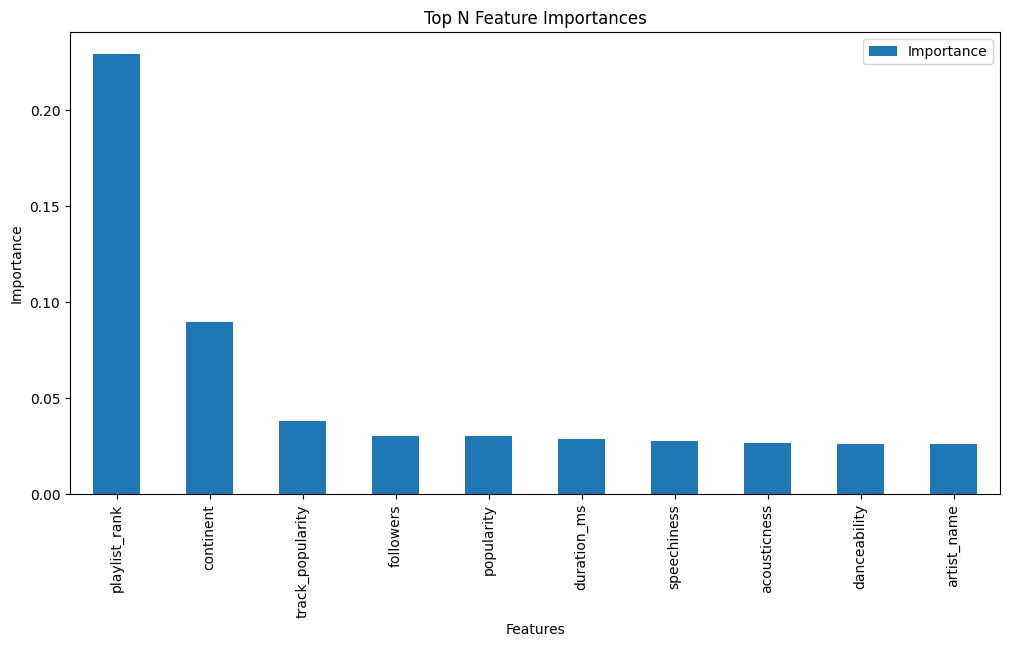

In [104]:
rf = df.copy()

X = rf.drop('market_id', axis=1)
y = rf['market_id']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (you may have already done this, but it's included here for clarity)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Extract feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_df = pd.DataFrame({
    'Features': features,
    'Importance': importances
})

# Sort the features based on importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the top N features
N = 10  # Change N to display more or fewer features
feature_df.head(N).plot(x='Features', y='Importance', kind='bar', figsize=(12, 6))
plt.title('Top N Feature Importances')
plt.ylabel('Importance')
plt.show()


In [105]:
feature_counts = [5, 10, 15, 20, 25]

for num_features in feature_counts:
    # Get the top 'num_features' features
    top_features = feature_df['Features'].head(num_features).tolist()

    # Filter dataset to use only the top 'num_features' features
    X_top_features = X[top_features]
    X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

    # Model Selection and Training
    model_top_features = RandomForestClassifier(n_estimators=100, random_state=42)
    model_top_features.fit(X_train, y_train)

    # Evaluation
    y_pred = model_top_features.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy using Random Forest Classifier with Top {num_features} Features: {accuracy * 100:.2f}%")

Accuracy using Random Forest Classifier with Top 5 Features: 28.42%
Accuracy using Random Forest Classifier with Top 10 Features: 30.18%
Accuracy using Random Forest Classifier with Top 15 Features: 28.95%
Accuracy using Random Forest Classifier with Top 20 Features: 30.70%
Accuracy using Random Forest Classifier with Top 25 Features: 32.46%


## PCA features

In [106]:
#PCA 
pca_feats = pd.read_csv('/Users/arturoavila/Documents/Milestone II Project/spotify-market-popularity/data/PCA_df_no_genre.csv')
pca_feats = pca_feats[['track_id','PC1','PC2']]
pca_feats.dtypes


track_id     object
PC1         float64
PC2         float64
dtype: object

In [107]:
pca_df = artists.merge(tracks, on="artist_id")
pca_df = pca_df[pca_df["market_id"] != "global"]

pca_df["market_id"] = pca_df["market_id"].str.replace("_", " ").str.title()
pca_df["market_id"] = pca_df["market_id"].replace("Uae","United Arab Emirates")
pca_df["market_id"] = pca_df["market_id"].replace("Usa","United States")

pca_df["continent"] = pca_df["market_id"].apply(country_to_continent)
pca_df['feat'] = pca_df['track_name'].str.contains('feat').astype(int)

pca_df = pca_df.merge(pca_feats, on="track_id")
pca_df.columns




Index(['artist_id', 'artist_name', 'followers', 'genres', 'popularity',
       'parent_genre', 'track_id', 'track_name', 'playlist_id', 'album_type',
       'album_id', 'artist_ids', 'explicit', 'track_popularity', 'market_id',
       'num_avail_markets', 'num_artists', 'playlist_rank',
       'tot_artist_followers', 'avg_artist_popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'continent', 'feat', 'PC1', 'PC2'],
      dtype='object')

In [108]:
columns_to_drop_pca = ['artist_id', 'track_id', 'track_name', 'playlist_id', 'album_id', 
                   'artist_ids','parent_genre','tot_artist_followers','avg_artist_popularity']

pca_df = pca_df.drop(columns=columns_to_drop_pca)

In [109]:
label_encoders = {}
for column in ['artist_name', 'album_type','continent','key','mode','time_signature','feat']:
    le = LabelEncoder()
    pca_df[column] = le.fit_transform(pca_df[column])
    label_encoders[column] = le



In [110]:
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(pca_df['genres']), columns=mlb.classes_, index=pca_df.index)
pca_df = pd.concat([pca_df.drop('genres',
axis=1), genres_encoded], axis=1)

In [111]:
pca_df.head()

,artist_name,followers,popularity,album_type,explicit,track_popularity,market_id,num_avail_markets,num_artists,playlist_rank,...,vietnamese melodic rap,vietnamese trap,viral afropop,viral pop,west coast rap,yacht rock,yemeni pop,zhenskiy rep,zhongguo feng,zxc
0,66,2932225,82,2,False,87,Brazil,184,1,6,...,0,0,0,0,0,0,0,0,0,0
1,66,2932225,82,2,False,80,Brazil,184,1,34,...,0,0,0,0,0,0,0,0,0,0
2,126,8035,52,2,False,65,Norway,184,1,16,...,0,0,0,0,0,0,0,0,0,0
3,126,8035,52,2,False,62,Norway,184,2,31,...,0,0,0,0,0,0,0,0,0,0
4,519,709383,67,2,False,83,Philippines,183,1,2,...,0,0,0,0,0,0,0,0,0,0


In [113]:
#PCA 
pca_df.fillna(value=0, inplace=True)

X = pca_df.drop('market_id', axis=1)
#X = pca_df[['PC1','PC2','artist_name', 'followers', 'popularity', 'track_popularity', 'num_avail_markets', 'num_artists', 'playlist_rank', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'continent']]

y = pca_df['market_id']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (you may have already done this, but it's included here for clarity)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the GradientBoostingClassifier
gb_model_pca = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model_pca.fit(X_train, y_train)

# Predict
y_pred = gb_model_pca.predict(X_test)

# Evaluate the model
print("Classification Report for Gradient Boosting Model:")
print(classification_report(y_test, y_pred))

# Calculate accuracy for the Gradient Boosting model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gradient Boosting Model: {accuracy * 100:.2f}%")

Classification Report for Gradient Boosting Model:
                      precision    recall  f1-score   support

           Argentina       1.00      0.76      0.87        34
           Australia       0.78      0.81      0.79       128
             Austria       0.74      0.67      0.70        88
             Belarus       0.81      0.59      0.68        29
             Belgium       0.62      0.58      0.60        90
              Brazil       0.86      1.00      0.92         6
              Canada       0.67      0.87      0.75        99
               Chile       0.97      0.88      0.92        40
            Colombia       0.58      0.75      0.66        56
      Czech Republic       0.60      0.73      0.66        60
             Denmark       0.77      0.89      0.83        62
  Dominican Republic       0.85      0.88      0.87        51
             Ecuador       0.50      0.48      0.49        71
               Egypt       0.96      0.93      0.94        27
             Finla

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(gb_model_pca, X, y, cv=5)

# Print the accuracy scores for each fold
for i, score in enumerate(cv_scores):
    print(f"Accuracy for Fold {i + 1}: {score * 100:.2f}%")

# Calculate the mean accuracy across all folds
mean_accuracy = cv_scores.mean()
print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")

Accuracy for Fold 1: 16.27%
Accuracy for Fold 2: 23.82%
Accuracy for Fold 3: 21.06%
Accuracy for Fold 4: 22.79%
Accuracy for Fold 5: 17.85%
Mean Accuracy: 20.36%


# Sensitivity Analysis

# Failure Analysis